# PROJET PYTHON FINAL A3 

On import DataFrame et numpy

In [1]:
# storing and anaysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Fonction qui crée les DataFrame des valeurs foncieres 2020 et 2019

In [2]:
data2020=pd.read_csv("./valeursfoncieres-2020.txt", sep="|",low_memory=False)
data2020.head()

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148.0


On commence le netoyage des données

In [3]:
#netoyage colonnes
column_with_nan = data2020.columns[data2020.isna().any()]
for column in column_with_nan:
    if data2020[column].isna().sum()*100.0/data2020.shape[0] > 50:
        data2020.drop(column,1, inplace=True)
uselesscolum = ['Section','No plan','Nombre de lots','Code type local','Nature culture','No voie','No disposition']
data2020.drop(uselesscolum,axis=1, inplace=True)
data2020

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,07/01/2020,Vente,"8000,00",NaN,B063,FORTUNAT,1250.0,CEYZERIAT,01,72,NaN,NaN,NaN,1061.0
1,02/01/2020,Vente,"2175,00",NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,01,203,NaN,NaN,NaN,85.0
2,02/01/2020,Vente,"2175,00",NaN,B006,BOIS DU CHAMP RION,1290.0,LAIZ,01,203,NaN,NaN,NaN,1115.0
3,02/01/2020,Vente,"2175,00",NaN,B025,EN COROBERT,1290.0,LAIZ,01,203,NaN,NaN,NaN,1940.0
4,02/01/2020,Vente,"2175,00",NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,01,203,NaN,NaN,NaN,1148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459555,16/12/2020,Vente,"1937500,00",RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,Appartement,87.0,4.0,447.0
2459556,16/12/2020,Vente,"1937500,00",RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,Dépendance,0.0,0.0,447.0
2459557,16/12/2020,Vente,"1937500,00",RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,Appartement,82.0,2.0,447.0
2459558,16/12/2020,Vente,"1937500,00",RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,Dépendance,0.0,0.0,447.0


In [4]:
#netoyage lignes
data2020 = data2020.dropna(axis=0,thresh=14)

In [5]:
data2020["Valeur fonciere"] = data2020["Valeur fonciere"].str.replace(',','.')
data2020.head()

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
13,06/01/2020,Vente,180300.00,RUE,0970,COMTE DE LA TEYSSONNIERE,1000.0,BOURG-EN-BRESSE,01,53,Maison,75.0,4.0,525.0
16,03/01/2020,Vente,350750.00,CHE,0149,DES GDES CADALLES,1000.0,SAINT-DENIS-LES-BOURG,01,344,Maison,201.0,7.0,1267.0
17,03/01/2020,Vente,350750.00,CHE,0149,DES GDES CADALLES,1000.0,SAINT-DENIS-LES-BOURG,01,344,Maison,201.0,7.0,1497.0
18,03/01/2020,Vente,350750.00,CHE,0149,DES GDES CADALLES,1000.0,SAINT-DENIS-LES-BOURG,01,344,Dépendance,0.0,0.0,1497.0
19,03/01/2020,Vente,350750.00,CHE,0149,DES GDES CADALLES,1000.0,SAINT-DENIS-LES-BOURG,01,344,Dépendance,0.0,0.0,1267.0


On convertie certaine colonnes en float

In [6]:
data2020["Valeur fonciere"] = pd.to_numeric(data2020["Valeur fonciere"])
data2020["Surface reelle bati"] = pd.to_numeric(data2020["Surface reelle bati"])
data2020["Code postal"] = data2020["Code postal"].astype({'Code postal': 'int32'})

In [7]:
# On calcul le prix au metre carré de chaque commune
tempPrix2020 = data2020
tempPrix2020 = tempPrix2020[(tempPrix2020["Surface terrain"]>0)]
tempPrix2020["Prix m2"] = (tempPrix2020["Valeur fonciere"] / tempPrix2020["Surface terrain"])
tmp2020 = tempPrix2020.groupby(["Code departement"])["Valeur fonciere","Surface terrain","Prix m2"].mean()
tmp2020.style.background_gradient(cmap='Blues')
type(tmp2020)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Code departement'>

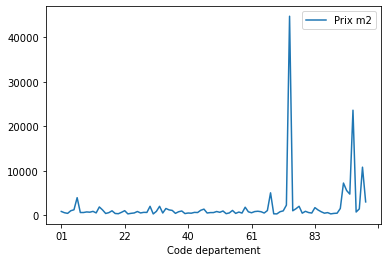

In [8]:
tmp2020['Code departement'] = tmp2020.index
tmp2020.plot(x='Code departement',y='Prix m2')


<AxesSubplot:title={'center':'Rapport valeur fonciere / Surface terrain en 2020 par departement'}, xlabel='Code departement'>

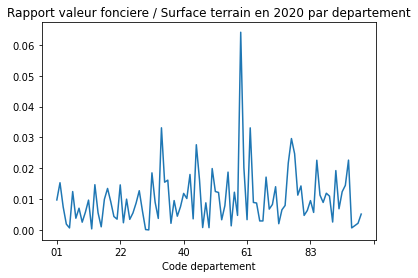

In [9]:
# Pourcentage de vente par region
DataFrameVenteMaison2020 = data2020[data2020['Nature mutation'] == "Vente"]
vente = DataFrameVenteMaison2020.groupby(["Code departement"])["Nature mutation"].count() / len(DataFrameVenteMaison2020)
vente.plot(title="Rapport valeur fonciere / Surface terrain en 2020 par departement")

<AxesSubplot:xlabel='Code departement'>

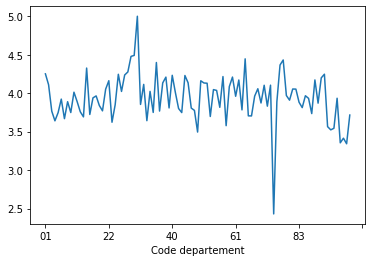

In [10]:
# Moyenne du nombre de piece par region
DataFrameNbPiece2020 = data2020[data2020['Nombre pieces principales'] != 0]
resPiece = DataFrameNbPiece2020.groupby(["Code departement"])["Nombre pieces principales"].mean()# / len(DataFramenbPiece2020)
resPiece.plot()

pandas.core.frame.DataFrame

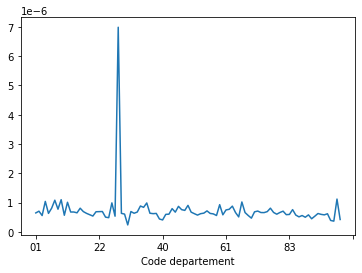

In [11]:
# On calcul le ratio terrain total par rapport a celui de la maison
dataSuperficie = data2020
dataSuperficie = dataSuperficie[(dataSuperficie["Surface terrain"]>0)]
dataSuperficie = dataSuperficie[(dataSuperficie["Surface reelle bati"]>0)]
dataSuperficie["ratioTerrainMaison"] = (tempPrix2020["Surface reelle bati"] / tempPrix2020["Surface terrain"])
tmpBis2020 = dataSuperficie.groupby(["Code departement"])["ratioTerrainMaison"].mean() / len(dataSuperficie)
#tmp.style.background_gradient(cmap='Blues')
tmpBis2020.plot()
type(tmp2020)

# ON COMPARE A 2019

In [12]:
#On initialise les data
data2019=pd.read_csv("./valeursfoncieres-2019.txt", sep="|",low_memory=False)
#netoyage colonnes
column_with_nan = data2019.columns[data2019.isna().any()]
for column in column_with_nan:
    if data2019[column].isna().sum()*100.0/data2019.shape[0] > 50:
        data2019.drop(column,1, inplace=True)
uselesscolum = ['Section','No plan','Nombre de lots','Code type local','Nature culture','No voie','No disposition']
data2019.drop(uselesscolum,axis=1, inplace=True)
#Netoyage lignes
data2019 = data2019.dropna(axis=0,thresh=14)
data2019["Valeur fonciere"] = data2019["Valeur fonciere"].str.replace(',','.')
#changement type colums 
data2019["Valeur fonciere"] = pd.to_numeric(data2019["Valeur fonciere"])
data2019["Surface reelle bati"] = pd.to_numeric(data2019["Surface reelle bati"])
data2019["Code postal"] = data2019["Code postal"].astype({'Code postal': 'int32'})
data2019

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
3,08/01/2019,Vente,209000.0,RUE,0043,DES CHAMPAGNES,1160,PRIAY,01,314,Maison,90.0,4.0,940.0
4,07/01/2019,Vente,134900.0,LOT,A003,LE BIOLAY,1370,SAINT-ETIENNE-DU-BOIS,01,350,Maison,101.0,5.0,490.0
5,03/01/2019,Vente,192000.0,ALL,0445,DES LIBELLULES,1340,ATTIGNAT,01,24,Maison,88.0,4.0,708.0
6,08/01/2019,Vente,45000.0,RTE,0001,DU VIADUC,1250,CIZE,01,106,Maison,39.0,2.0,631.0
13,07/01/2019,Vente,116000.0,RTE,0105,DE MONTLEGER,1560,MANTENAY-MONTLIN,01,230,Maison,100.0,1.0,2103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533199,05/12/2019,Vente,17521000.0,QUAI,0940,DE BETHUNE,75004,PARIS 04,75,104,Appartement,52.0,2.0,470.0
3533200,05/12/2019,Vente,17521000.0,QUAI,0940,DE BETHUNE,75004,PARIS 04,75,104,Dépendance,0.0,0.0,470.0
3533201,05/12/2019,Vente,17521000.0,QUAI,0940,DE BETHUNE,75004,PARIS 04,75,104,Dépendance,0.0,0.0,470.0
3533202,05/12/2019,Vente,17521000.0,QUAI,0940,DE BETHUNE,75004,PARIS 04,75,104,Appartement,120.0,5.0,470.0


<AxesSubplot:title={'center':'Rapport valeur fonciere / Surface terrain en 2019 par departement'}, xlabel='Code departement'>

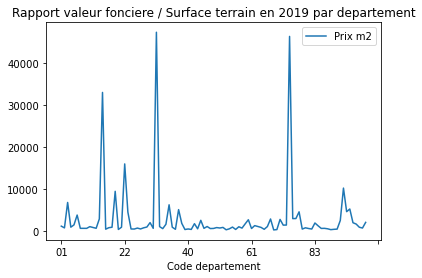

In [13]:
# On calcul le prix au metre carré de chaque commune en 2019
tempPrix2019 = data2019
tempPrix2019 = tempPrix2019[(tempPrix2019["Surface terrain"]>0)]
tempPrix2019["Prix m2"] = (tempPrix2019["Valeur fonciere"] / tempPrix2019["Surface terrain"])
tmp2019 = tempPrix2019.groupby(["Code departement"])["Valeur fonciere","Surface terrain","Prix m2"].mean()
tmp2019['Code departement'] = tmp2019.index
tmp2019.plot(x='Code departement',y='Prix m2',title="Rapport valeur fonciere / Surface terrain en 2019 par departement")

In [14]:
# On fusionne les 2 graphs ( rapport vente par departement )
tmp2020

,Valeur fonciere,Surface terrain,Prix m2,Code departement
Code departement,,,,
01,3.070938e+05,848.306101,897.639361,01
02,1.501564e+05,639.503600,615.104388,02
03,1.476110e+05,939.764346,472.165424,03
04,2.283909e+05,814.994590,1064.209115,04
05,3.157607e+05,603.837270,1276.309895,05
...,...,...,...,...
95,2.269194e+07,2512.422033,23654.374677,95
971,4.225206e+06,7278.723238,776.737778,971
972,4.364906e+06,3199.664242,1485.289663,972


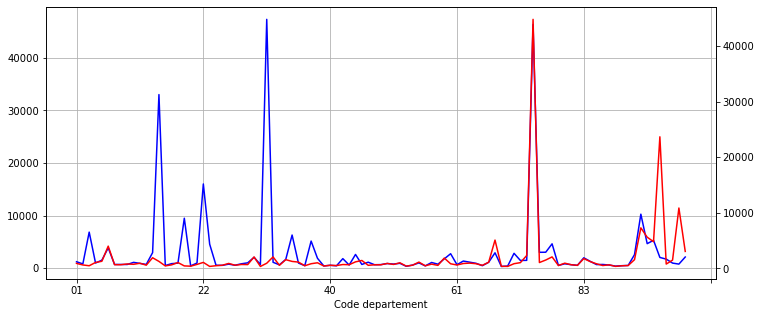

In [15]:
tmpDuo2020 = tmp2020["Prix m2"]
tmpDuo2019 = tmp2019["Prix m2"]
plt.figure(figsize=(12,5))
ax1 = tmpDuo2019.plot(color='blue', grid=True, label='Count')
ax2 = tmpDuo2020.plot(color='red', grid=True, secondary_y=True, label='Sum')